## Customer lifetime value modeling

In [1]:
## load the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

### Exploratory Data Analysis(EDA)

#### Read in the data set

In [2]:
## import the data
gld = pd.read_csv("goldzoneplayers(1).csv")
gld.head()

,PlayerID,Gender,MarStatus,Age,Education,Employment,Consecutive,TotalSpend,Unnamed: 8
0,1.0,M,S,24.0,HS,H,1.0,4430.0,NaN
1,2.0,M,S,27.0,C,S,3.0,6837.0,NaN
2,3.0,M,S,35.0,HS,S,3.0,5899.0,NaN
3,4.0,M,M,40.0,C,S,7.0,1524.0,NaN
4,5.0,M,S,19.0,HS,S,3.0,4474.0,NaN


In [3]:
## dropping the NAN in the dataset
gld.isnull().sum()
## dropping the unnamed column
gld = gld.drop(['Unnamed: 8'], axis = 1)

## drop the other NaNs in the other variables
gld = gld.dropna()


In [4]:
gld.info()
gld.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169 entries, 0 to 169
Data columns (total 8 columns):
PlayerID       169 non-null float64
Gender         169 non-null object
MarStatus      169 non-null object
Age            169 non-null float64
Education      169 non-null object
Employment     169 non-null object
Consecutive    169 non-null float64
TotalSpend     169 non-null float64
dtypes: float64(4), object(4)
memory usage: 11.9+ KB


PlayerID       0
Gender         0
MarStatus      0
Age            0
Education      0
Employment     0
Consecutive    0
TotalSpend     0
dtype: int64

#### Creating the visualizations

Text(0.5, 1.0, 'How different gender did spend')

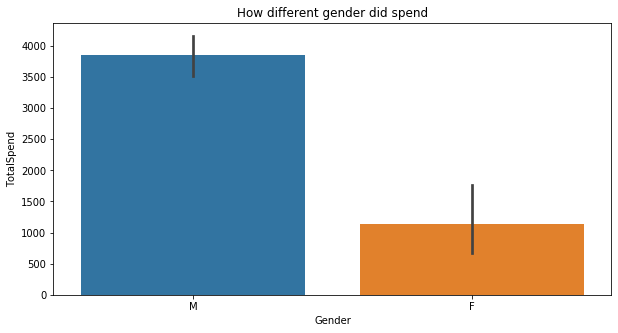

In [5]:
## figure sizes
plt.figure(figsize = (10,5))

## bar plot
sns.barplot(x = 'Gender', y = 'TotalSpend', data = gld)
plt.title("How different gender did spend")

The bar plot shows the total spend of different gender during the 2019 session. From the graph its evident that male gender did spend quite higher than the females.

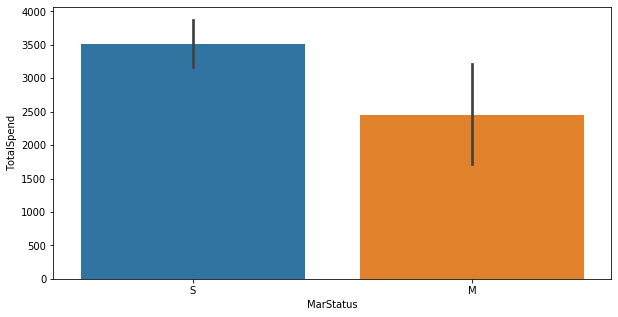

In [6]:
## plot2
## figure sizes
plt.figure(figsize = (10,5))

## bar plot
sns.barplot(x = 'MarStatus', y = 'TotalSpend', data = gld)

The bar graph shows the distribution of how much the individuals did spend during the 2019 season in relation to their marital status that is if they were married or they are single.we can see that the people who did spend a lot are the those who were single as compared to those married.

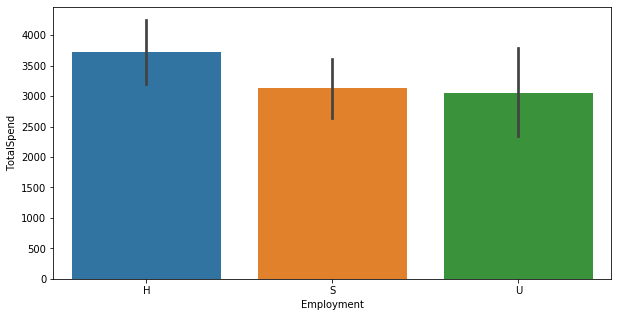

In [7]:
## plot 3
## figure sizes
plt.figure(figsize = (10,5))

## bar plot
sns.barplot(x = 'Employment', y = 'TotalSpend', data = gld)

Also it would be interesting to look at how the different employment status did spend during that season. From the graph its evident that those who were on a hourly wage employees did spend more than the other individuals, as we would expect the unemployed did spend less.

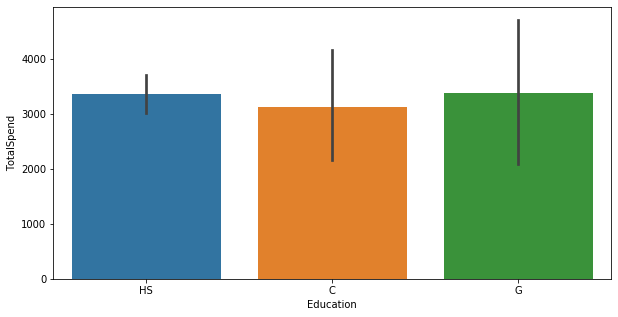

In [8]:
## plot 4
## figure sizes
plt.figure(figsize = (10,5))

## bar plot
sns.barplot(x = 'Education', y = 'TotalSpend', data = gld)

I was also interested in looking at how education of the individuals was related to the total spending and i found out that it did not have quiet a big impact since the values were somehow the same though those with grad school education spent more than the others.

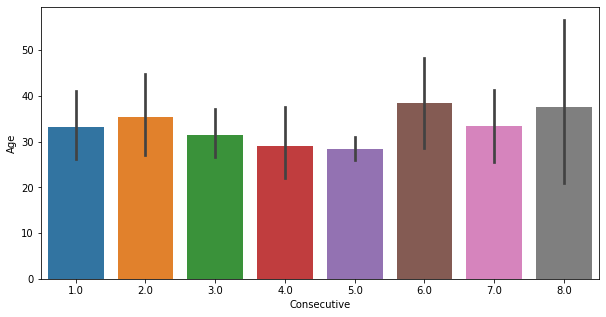

In [9]:
## plot 5
## figure sizes
plt.figure(figsize = (10,5))

## bar plot
sns.barplot(x = 'Consecutive', y = 'Age', data = gld)

My interest was how consecutive the individuals visited golden zone and the relation to their ages, as seen its evident that their wasn't a great different since it is said that some families usually pass down membership and that there are discounts for that. 

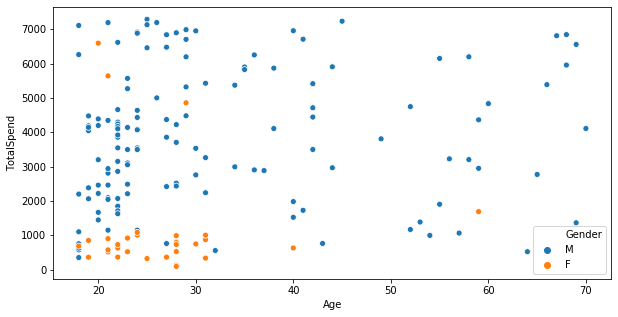

In [10]:
## plot 6
## figure sizes
plt.figure(figsize = (10,5))

## bar plot
sns.scatterplot(x = 'Age', y = 'TotalSpend', hue = "Gender", data = gld)

I was interested in the relationship between the age of the individuals and total spend, and the scatter plot shows that most of the spend was for the young people as its seen that age between 18 to 30 had the most concentration of the points. The older spend a little. Also the males were so dorminant in the distribution as we can see they are everywhere and ladies only occupy just few points.

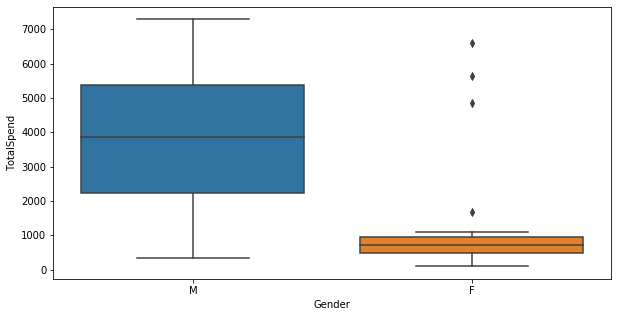

In [11]:
## plot 7
## figure sizes
plt.figure(figsize = (10,5))

## bar plot
sns.boxplot(x = 'Gender', y = 'TotalSpend', data = gld)

I was interested in the distribution of the total spend in relation to gender so as to be able to know where median values did lie and if any outliers existed. from the plot we can see that the median value for men was higher than for ladies and for females we have some values that are too extreme (outliers), the distribution for females wasn't normal.

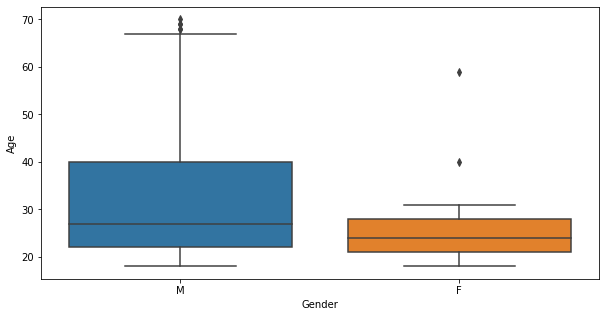

In [12]:
## plot 8
## figure sizes
plt.figure(figsize = (10,5))

## bar plot
sns.boxplot(x = 'Gender', y = 'Age', data = gld)

The reason behind this was to look at how the ages of the individuals was related to different gender. The median values are not that much different as seen but we have some extreme ages for the distributions but mostly for the males.

In [13]:
## using groupby
gld.groupby(['Gender', 'Employment'])['TotalSpend'].describe()

count         mean          std    min      25%     50%  \
Gender Employment                                                            
F      H             8.0   732.000000   252.101454  324.0   601.50   705.5   
       S            12.0  1202.833333  1748.033380  131.0   364.75   740.0   
       U            12.0  1350.500000  1841.313736   93.0   479.75   709.0   
M      H            55.0  4160.927273  1913.858250  556.0  2502.50  4194.0   
       S            57.0  3539.947368  1922.069127  351.0  2044.00  3260.0   
       U            25.0  3864.880000  2040.572169  522.0  2860.00  3854.0   

                       75%     max  
Gender Employment                   
F      H            923.75  1084.0  
       S           1004.25  6592.0  
       U            811.25  5639.0  
M      H           5761.00  7192.0  
       S           4474.00  7285.0  
       U           4832.00  7231.0

From the summaries above i used to groups that is gender and the education of the customers, i can say that for females those with hourly wage pay did spend alot as we can see that the minimum amount was 324 dollars and highest was 1084. for men who were many also those with hourly wage pay did spend a lot minimum of 556 and 7192 as highest. The average value for highest spenders for females was the unemployed group with 1350, while for male was the hourly wage pay group.

### Linear Regression model

In [14]:
df = gld.copy()
df.head()

,PlayerID,Gender,MarStatus,Age,Education,Employment,Consecutive,TotalSpend
0,1.0,M,S,24.0,HS,H,1.0,4430.0
1,2.0,M,S,27.0,C,S,3.0,6837.0
2,3.0,M,S,35.0,HS,S,3.0,5899.0
3,4.0,M,M,40.0,C,S,7.0,1524.0
4,5.0,M,S,19.0,HS,S,3.0,4474.0


In [15]:
## dropping one level that is creating dummy variables

dummy = pd.get_dummies(df[['Gender','MarStatus','Education','Employment']], drop_first = True)
## merge
df = pd.concat([df, dummy], axis =1)
df.head()

,PlayerID,Gender,MarStatus,Age,Education,Employment,Consecutive,TotalSpend,Gender_M,MarStatus_S,Education_G,Education_HS,Employment_S,Employment_U
0,1.0,M,S,24.0,HS,H,1.0,4430.0,1,1,0,1,0,0
1,2.0,M,S,27.0,C,S,3.0,6837.0,1,1,0,0,1,0
2,3.0,M,S,35.0,HS,S,3.0,5899.0,1,1,0,1,1,0
3,4.0,M,M,40.0,C,S,7.0,1524.0,1,0,0,0,1,0
4,5.0,M,S,19.0,HS,S,3.0,4474.0,1,1,0,1,1,0


In [16]:
## columns to be used
colsToDrop = ['Gender','MarStatus','Education','Employment']
df = df.drop(colsToDrop, axis = 1)
df.head()

,PlayerID,Age,Consecutive,TotalSpend,Gender_M,MarStatus_S,Education_G,Education_HS,Employment_S,Employment_U
0,1.0,24.0,1.0,4430.0,1,1,0,1,0,0
1,2.0,27.0,3.0,6837.0,1,1,0,0,1,0
2,3.0,35.0,3.0,5899.0,1,1,0,1,1,0
3,4.0,40.0,7.0,1524.0,1,0,0,0,1,0
4,5.0,19.0,3.0,4474.0,1,1,0,1,1,0


In [17]:
X = df.drop(['TotalSpend'], axis = 1)
y = df['TotalSpend']
## split the dataset

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 1/3, random_state = 1)

In [18]:
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)
## intercept
# print the intercept
print(lr_model.intercept_)


236.8959770227898


In [19]:
# print the coefficients
coeff_df = pd.DataFrame(lr_model.coef_, X.columns, columns=['Coefficient'])
coeff_df



,Coefficient
PlayerID,-3.202343
Age,21.654628
Consecutive,-101.569346
Gender_M,2468.620199
MarStatus_S,1292.439383
Education_G,1417.925482
Education_HS,-138.662601
Employment_S,-122.929458
Employment_U,179.989512


Holding all other features fixed, a 1 unit increase in PlayerID of customers is associated with an decrease of $3.202343. 

Holding all other features fixed, a 1 unit increase in Age of the customers is associated with an increase of $21.654628. 

Holding all other features fixed, a 1 unit increase in how consecutive the customers visited goldzone is associated with a decrease of $101.569346. 

Holding all other features fixed, a 1 unit increase in gender_M is associated with an increase $2468.6200199.

Holding all other features fixed, a 1 unit increase in marital status_S is associated with an increase of $1292.439383. 

Holding all other features fixed, a 1 unit increase in education grad level is associated with an increase of $1417.925482. 

Holding all other features fixed, a 1 unit increase in education high school level is associated with an decrease of $138.662601.

Holding all other features fixed, a 1 unit increase in employment salaried is associated with an decrease of $122.93

Holding all other features fixed, a 1 unit increase in employment unemployed is associated with an increase of $179.9895.


In [20]:
from sklearn import metrics
def print_evaluate(true, predicted):  
    mae = metrics.median_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    
## calculating the statistics
train_pred = lr_model.predict(X_train)
test_pred = lr_model.predict(X_test)


print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)
print('====================================')
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
                            
                            


Train set evaluation:
_____________________________________
MAE: 1054.4392516210128
MSE: 3066171.029708241
RMSE: 1751.0485514994268
R2 Square 0.32900063014971315
Test set evaluation:
_____________________________________
MAE: 1378.303045285761
MSE: 3693364.2731878827
RMSE: 1921.8127570572224
R2 Square 0.1859374905647313


### Decision tree model

In [21]:
## dropping one level that is creating dummy variables
df1 = gld.copy()

dummy = pd.get_dummies(df1[['Gender','MarStatus','Education','Employment']])
## merge
df1 = pd.concat([df1, dummy], axis =1)
df1.head()

,PlayerID,Gender,MarStatus,Age,Education,Employment,Consecutive,TotalSpend,Gender_F,Gender_M,MarStatus_M,MarStatus_S,Education_C,Education_G,Education_HS,Employment_H,Employment_S,Employment_U
0,1.0,M,S,24.0,HS,H,1.0,4430.0,0,1,0,1,0,0,1,1,0,0
1,2.0,M,S,27.0,C,S,3.0,6837.0,0,1,0,1,1,0,0,0,1,0
2,3.0,M,S,35.0,HS,S,3.0,5899.0,0,1,0,1,0,0,1,0,1,0
3,4.0,M,M,40.0,C,S,7.0,1524.0,0,1,1,0,1,0,0,0,1,0
4,5.0,M,S,19.0,HS,S,3.0,4474.0,0,1,0,1,0,0,1,0,1,0


In [22]:
## columns to be used
colsToDrop = ['Gender','MarStatus','Education','Employment']
df1 = df1.drop(colsToDrop, axis = 1)
df1.head()

,PlayerID,Age,Consecutive,TotalSpend,Gender_F,Gender_M,MarStatus_M,MarStatus_S,Education_C,Education_G,Education_HS,Employment_H,Employment_S,Employment_U
0,1.0,24.0,1.0,4430.0,0,1,0,1,0,0,1,1,0,0
1,2.0,27.0,3.0,6837.0,0,1,0,1,1,0,0,0,1,0
2,3.0,35.0,3.0,5899.0,0,1,0,1,0,0,1,0,1,0
3,4.0,40.0,7.0,1524.0,0,1,1,0,1,0,0,0,1,0
4,5.0,19.0,3.0,4474.0,0,1,0,1,0,0,1,0,1,0


In [23]:
from sklearn.tree import DecisionTreeRegressor
x = df.drop('TotalSpend', axis = 1)
Y = df['TotalSpend']

In [24]:

## split the dataset

x_train,x_test,ytrain,ytest = train_test_split(x,Y, test_size = 1/3, random_state = 1)

In [25]:
## fit the model
regressor = DecisionTreeRegressor(max_depth = 4)
regressor.fit(x_train, ytrain)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

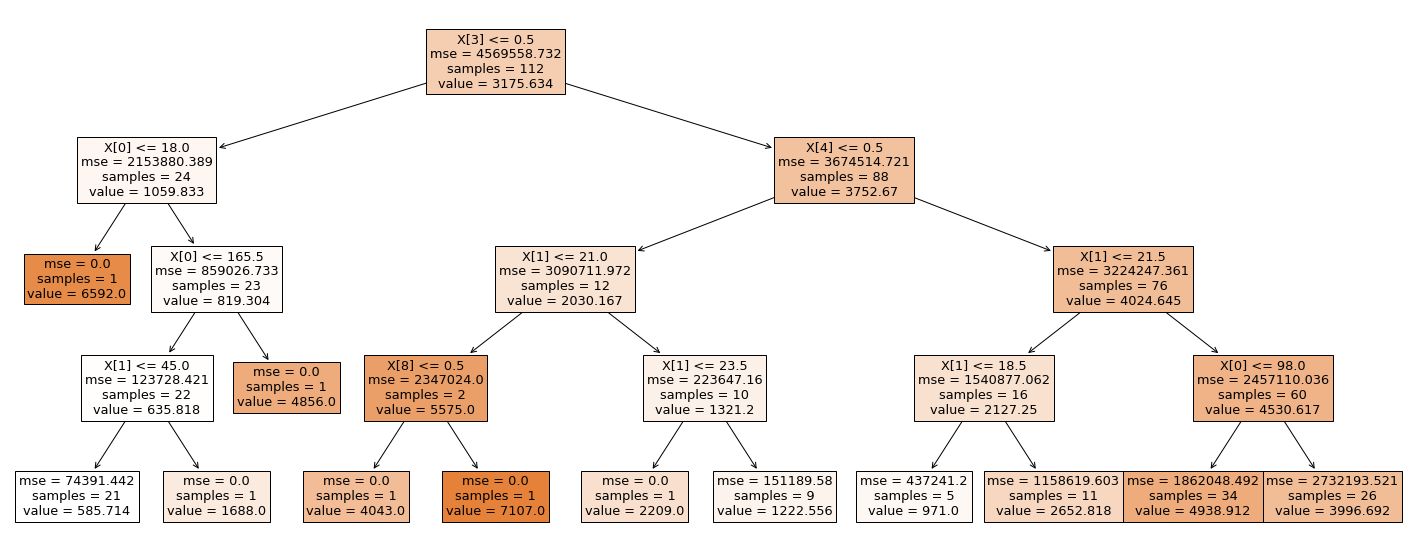

In [26]:
## plot the tree
from sklearn.tree import plot_tree
plt.figure(figsize = (25,10))
plot_tree(regressor, filled = True)
plt.show()

The first rule starts with the gender female variable being broken into if its lower or equal to 0.5, then followed by the playerID variable being less than or equal to 18 and the first rule ends there with mse of zero. The second rule begins with evaluating if the gender female is less than or equal to 5 followed by playerID being greater than 18 then followed by evaluating if playerid is less than or equal to 165.5 then continues to grow and further evaluates if age is less or equal to 45 and gives an mse of 74391.442. starting from the first breaking of gender female greater than 0.5 we follow the next which evaluates marital status male less than or equal to 0.5 then continuing to age less than or equal to 21 followed by age less than o equal 18.5 and the mse becomes zero and 1 sample. the last rule follows the previous rule but breaks where age is greater than 21 and further evaluating the age where it is greater than 23.5 giving an mse of 1511189.48 with 9 samples and gives a value of 1222.556. 


In [27]:
from sklearn import metrics
def print_evaluate(true, predicted):  
    mae = metrics.median_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    
## calculating the statistics
train1_pred = regressor.predict(x_train)
test1_pred = regressor.predict(x_test)


print('Train set evaluation:\n_____________________________________')
print_evaluate(ytrain, train1_pred)
print('====================================')
print('Test set evaluation:\n_____________________________________')
print_evaluate(ytest, test1_pred)
                            
                            


Train set evaluation:
_____________________________________
MAE: 534.364973262032
MSE: 1358934.1823040696
RMSE: 1165.7333238370043
R2 Square 0.7026115075906867
Test set evaluation:
_____________________________________
MAE: 680.4444444444443
MSE: 2292641.549707087
RMSE: 1514.1471360825826
R2 Square 0.49467385420415233


### visualizing the residuals

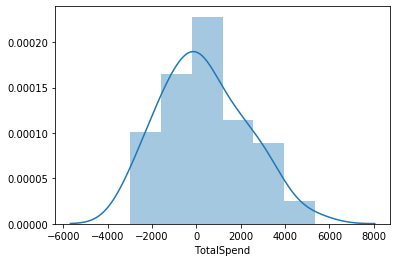

In [28]:
lr_resid = y_test - test_pred

## histogram
sns.distplot(lr_resid)

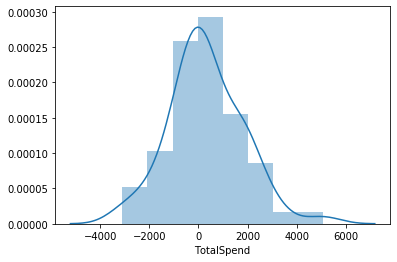

In [29]:
reg_tree_resid = ytest-test1_pred
sns.distplot(reg_tree_resid)

The logistic regression residuals are somehow normally distributed and are together but for the tree model we have some points which are somehow away from the the others, its kinda normal. this suggests that one model performed better than the other.

For RMSE the values reduced, in the linear regression they were higher but in the tree model it reduced. for the r squared it increased when we used the tree model. For MAE the values also reduced that it the error was minimized.

Lobster land care would care about such a model that would predict the total expenditure so that they may know how to do there marketing and which customers they would prefer to offer discounts and where will there marketing strength go to. they would use such a model to predict what the customers are going to spend the following year and plan on how to offer their services at best. knowing how much a customer is going to spend is good for marketing and creating product awareness.

From the two models fit the linear regression and decision tree regressor, for the linear regression it calculates the coefficients then fits them to the variables appropriately and uses them to make predictions. For the tree model we see that it creates rules by evaluating from the most important to the least important variables in use for the prediction. For trees models it calculates the performance and samples as it goes down to the tree depth specified. From the EDA i was able to visualize different variables and their relationships that existed between them and saw that some showed an existence of a relationship with  the target variable. Also calculating the different summary statistics in relation to different variables indicated how the target variable depended on the other variables and this played a critical role when it comes to predictions as this was able to bring some good predictions. Thinking about the performance of the linear regression as it performed poorly, i dont think it will ever perform better than decision trees model, this is because linear regression doesnt have parameters to be tuned for an optimal performance as compared to the decision tree which can be pruned and tuned for a better performance. 